# Machine Learning

## Árvore de Decisão



*   **Aplicando na base de dados Iris**



In [ ]:
# Carregando bibliotecas

import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz

In [ ]:
# Carregando base de dados

dados = load_iris()

**Dividindo os dados em treino e teste**

In [ ]:
# Carregando biblioteca

from sklearn.model_selection import train_test_split

In [ ]:
# Divindindo os dados

X_treino, X_teste, y_treino, y_teste = train_test_split(dados.data, dados.target, test_size = 0.3)

In [ ]:
# Verificando a forma dos dados

X_treino.shape, X_teste.shape

((105, 4), (45, 4))

In [ ]:
# Verificando a forma dos dados

y_treino.shape, y_teste.shape

((105,), (45,))

**Instânciando o modelo**

In [ ]:
modelo = tree.DecisionTreeClassifier()

**Treinando o modelo**

In [ ]:
modelo = modelo.fit(X_treino, y_treino)

In [ ]:
# Verificando as features mais importantes para o modelo

for feature, importancia in zip(dados.feature_names, modelo.feature_importances_):
  print('{}: {}'.format(feature, importancia))

sepal length (cm): 0.0
sepal width (cm): 0.0
petal length (cm): 0.07911105057659135
petal width (cm): 0.9208889494234087


**Executando o modelo com os dados de teste e testando com dados de exemplo**

In [ ]:
# Aplicando o modelo com os dados de teste

resultado = modelo.predict(X_teste)
resultado

array([1, 2, 1, 2, 2, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0,
       2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 2,
       2])

In [ ]:
# Testando o modelo com uma nova amostra

teste = np.array([[5.1, 3.5, 1.4, 0.2]])
modelo.predict(teste)

array([0])

**Métricas de Validação**

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_teste, resultado, target_names = dados.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.92      0.96        13
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



## Árvore de Decisão: forma gráfica

In [ ]:
# Carregando bibliotecas

import pydot
import graphviz
from ipywidgets import interactive

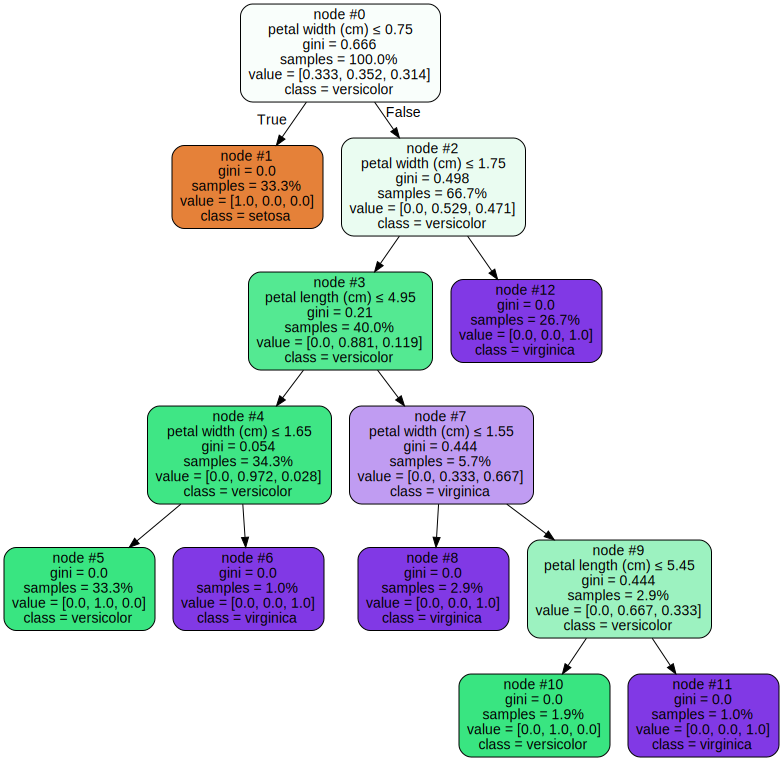

In [ ]:
# Visualizando a árvore

dot_data = tree.export_graphviz(
    modelo,
    out_file = None,
    feature_names = dados.feature_names,
    class_names = dados.target_names,
    filled = True, rounded = True,
    proportion = True,
    node_ids = True,
    rotate = False,
    label = 'all',
    special_characters = True
)

graph = graphviz.Source(dot_data)
graph